In [31]:
##console


adc.json  gdrive/         __pycache__/  saved_models/   tqdm_utils.py
data/     keras_utils.py  sample_data/  submission.csv  train.zip


#Tensorboard

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [5]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.6/json/__init__.py", line 299, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [4]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-09-12 17:52:09--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.232.177.141, 54.164.212.100, 52.73.84.118, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.232.177.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  12.98M  6.56MB/s    in 2.0s    

2019-09-12 17:52:12 (6.56 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [1]:
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/keras_utils.py -O keras_utils.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/tqdm_utils.py -O tqdm_utils.py
import tqdm_utils
import keras_utils

--2019-09-14 09:14:53--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/keras_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2642 (2.6K) [text/plain]
Saving to: ‘keras_utils.py’

keras_utils.py      100%[===================>]   2.58K  --.-KB/s    in 0s      

2019-09-14 09:14:53 (56.3 MB/s) - ‘keras_utils.py’ saved [2642/2642]

--2019-09-14 09:14:57--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/tqdm_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1870 (1.8K) [text/plain]
Saving to: ‘tqdm_ut

Using TensorFlow backend.


In [2]:
! pip install keras_tqdm
! pip install pydrive

#IMPORTS

In [5]:
import keras
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras.applications import resnet50
from keras.models import Sequential,Model,load_model
from keras.layers import MaxPooling2D, Flatten,Dropout,Dense, Activation,GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import backend as K
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import files

In [0]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np

#Adding data from drive

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '18hWXpKxKdzlrmgtRRAHeRwtfTQQ4kWVw'})
download.GetContentFile('train.zip')

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
##Unzipping data
!unzip train.zip

Archive:  train.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#Splitting

In [0]:
##Loading images to a list
def convertTrain(train):
  train_img = []
  for i in tqdm(range(train.shape[0])):
    img = image.load_img('data/train/'+train['image_id'][i].astype('str')+'.jpg',target_size=(100,100,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255
    (h,w,c) = img.shape
    i= min(h,w)
    cropped_img = img[(h-i)//2:((h-i)//2)+i,(w-i)//2:((w-i)//2)+i,:]
    train_img.append(cropped_img)
  return np.array(train_img)

##Loading test images
def convertTest(test):
  test_img = []
  for i in tqdm(range(test.shape[0])):
    img = image.load_img('data/test/'+test['image_id'][i].astype('str')+'.jpg',target_size=(100,100,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255
    test_img.append(img)
  return np.array(test_img)

In [0]:
train = pd.read_csv('data/train.csv')
X = convertTrain(train)
y = train['category']
y_classes = np.unique(y)

array([[[[0.31764707, 0.29411766, 0.20784314],
         [0.23529412, 0.29803923, 0.19215687],
         [0.21568628, 0.2627451 , 0.1764706 ],
         ...,
         [0.11372549, 0.1882353 , 0.10196079],
         [0.11764706, 0.19215687, 0.10588235],
         [0.1254902 , 0.2       , 0.1254902 ]],

        [[0.27058825, 0.2901961 , 0.2       ],
         [0.1882353 , 0.24705882, 0.15686275],
         [0.16862746, 0.21960784, 0.14117648],
         ...,
         [0.14509805, 0.21960784, 0.13333334],
         [0.14117648, 0.21568628, 0.12941177],
         [0.12156863, 0.21568628, 0.12156863]],

        [[0.18431373, 0.2627451 , 0.16470589],
         [0.18039216, 0.2509804 , 0.16470589],
         [0.15686275, 0.22352941, 0.14901961],
         ...,
         [0.14901961, 0.22352941, 0.13725491],
         [0.15686275, 0.23137255, 0.14509805],
         [0.14117648, 0.2       , 0.10980392]],

        ...,

        [[0.05490196, 0.04705882, 0.05098039],
         [0.03137255, 0.03137255, 0.02352941]

In [0]:
NUM_CLASSES = 103

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


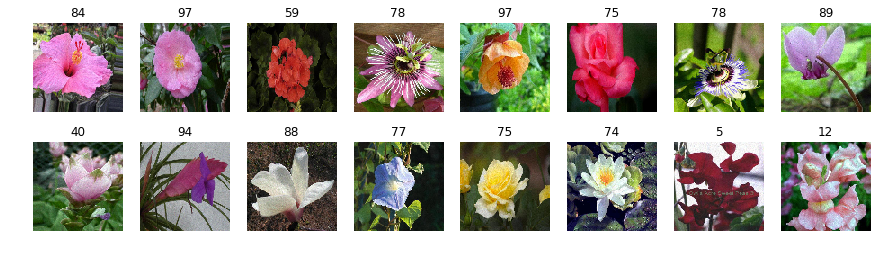

In [15]:
##Looking at random images
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(y_classes[y_train[random_index]])
plt.show()

In [0]:
##Normalize dataset and covert labels to one-hot encoded form
x_train = X_train
x_test = X_test
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)


In [0]:
#Defining some paramenter
##We can fine tune these to get better results
batch_size = 32
epochs = 200
data_augmentation = True
num_classes = 103


subtract_pixel_mean = True

n = 3

depth = n*9 + 2

model_type = "ResNetV2"

#RESNETv2 MODEL

In [0]:
input_shape = x_train.shape[1:]

if subtract_pixel_mean:
  x_train_mean = np.mean(x_train,0)
  x_train -= x_train_mean
  x_test -= x_train_mean

In [0]:
def lr_schedule(epoch):
  lr = 1e-3
  if epoch >180:
    le *= 0.5e-3
  elif epoch > 160:
        lr *= 1e-3
  elif epoch > 120:
        lr *= 1e-2
  elif epoch > 80:
        lr *= 1e-1
  return lr

class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [0]:
def resnet_layer(inputs,num_filters = 16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
  
  conv = Conv2D(num_filters,
               kernel_size=kernel_size,
               strides = strides,
               padding='same',
               kernel_initializer='he_normal',
            )
  
  x = inputs
  if conv_first:
    x = conv(x)
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
  else:
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
    x = conv(x)
  return x      

In [0]:
##Architecture of Resnet
def resnet_v2(input_shape,depth,num_classes=103):
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    
    
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  
                    strides = 2    
                    
            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)
    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [0]:
#Model compilation and summary
model = resnet_v2(input_shape = input_shape,depth=depth)
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=lr_schedule(0)),
             metrics=['accuracy'])
model.summary()

In [0]:
##Checkpoint function to save weights 
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'flower_%s_model.{epoch:03d}.h5' % 'resnet50'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

In [0]:
## Callbacks model is going to use
checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_acc',verbose=1,save_best_only=True)
#checkpoint = keras_utils.ModelSaveCallback(model_name)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=64,
                         write_images=True)

callbacks = [checkpoint,lr_scheduler,lr_reducer,TQDMNotebookCallback()]

In [0]:
model = load_model('saved_models/flower_resnet50_model.025.h5')

In [0]:
##initial_epoch = 22

In [0]:
## Fitting our model
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using data augmentation')
    
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,        
        data_format=None,
        validation_split=0.0)

    datagen.fit(x_train)
    model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                        callbacks=callbacks)

In [34]:
# Score trained model.
scores = model.evaluate(x_test,y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

3708/3708 [==============================] - 16s 4ms/step
Test loss: 0.30662601191988526
Test accuracy: 0.9110032363745516


In [35]:
#Loading test data
test = pd.read_csv('data/test.csv')
test = convertTest(test)

100%|██████████| 2009/2009 [00:09<00:00, 219.01it/s]


In [0]:
#Prediction on test data
pred = model.predict(test)
predictions = np.argmax(pred,axis=1)

In [0]:
#creating submission file
sample = pd.read_csv('data/sample_submission.csv')
sample['category'] = predictions
sample.to_csv('submission.csv',header=True,index=False)

In [0]:
files.download('submission.csv')

#MobileNet


In [43]:
h,w = 100,100
num_classes = 103
base_model = resnet50.ResNet50(weights=None, include_top=False, input_shape=(h,w,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [44]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
preds = Dense(num_classes, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = preds)

In [0]:
adam = Adam(lr=0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train,
          validation_data=(x_test,y_test),
          callbacks=callbacks,
          epochs = 100,
          batch_size = 64,
          verbose=1
         )

Train on 14832 samples, validate on 3708 samples


Epoch 1/100


14832/14832 [==============================] - 160s 11ms/step - loss: 5.7318 - acc: 0.0197 - val_loss: 5.2985 - val_acc: 0.0359
Epoch 2/100


14832/14832 [==============================] - 138s 9ms/step - loss: 4.8155 - acc: 0.0350 - val_loss: 4.5770 - val_acc: 0.0626
Epoch 3/100


14832/14832 [==============================] - 138s 9ms/step - loss: 4.3435 - acc: 0.0695 - val_loss: 3.9547 - val_acc: 0.1071
Epoch 4/100


14832/14832 [==============================] - 138s 9ms/step - loss: 3.9648 - acc: 0.1088 - val_loss: 3.5254 - val_acc: 0.1559
Epoch 5/100


14832/14832 [==============================] - 138s 9ms/step - loss: 3.6604 - acc: 0.1474 - val_loss: 3.3705 - val_acc: 0.1996
Epoch 6/100


14832/14832 [==============================] - 138s 9ms/step - loss: 3.4587 - acc: 0.1916 - val_loss: 4.3522 - val_acc: 0.1834
Epoch 7/100


14832/14832 [==============================] - 139s 9ms/step - loss: 3.1609 - acc: 0.2373 - val_loss: 3.0134 - val_acc: 0.2778
Epoch 8/100


14832/14832 [==============================] - 139s 9ms/step - loss: 2.8880 - acc: 0.2821 - val_loss: 2.9334 - val_acc: 0.2945
Epoch 9/100


14832/14832 [==============================] - 139s 9ms/step - loss: 2.6652 - acc: 0.3309 - val_loss: 2.8078 - val_acc: 0.2772
Epoch 10/100


14832/14832 [==============================] - 139s 9ms/step - loss: 2.4419 - acc: 0.3739 - val_loss: 3.4170 - val_acc: 0.1980
Epoch 11/100


14832/14832 [==============================] - 139s 9ms/step - loss: 2.3597 - acc: 0.4010 - val_loss: 4.0559 - val_acc: 0.1472
Epoch 12/100


14832/14832 [==============================] - 139s 9ms/step - loss: 2.1122 - acc: 0.4549 - val_loss: 3.4834 - val_acc: 0.2395
Epoch 13/100


14832/14832 [==============================] - 139s 9ms/step - loss: 1.8348 - acc: 0.5188 - val_loss: 3.0594 - val_acc: 0.3047
Epoch 14/100


14832/14832 [==============================] - 139s 9ms/step - loss: 1.6909 - acc: 0.5496 - val_loss: 3.9489 - val_acc: 0.2327
Epoch 15/100


14832/14832 [==============================] - 139s 9ms/step - loss: 1.5122 - acc: 0.6025 - val_loss: 4.2656 - val_acc: 0.2203
Epoch 16/100


14832/14832 [==============================] - 139s 9ms/step - loss: 1.3256 - acc: 0.6522 - val_loss: 3.6391 - val_acc: 0.2478
Epoch 17/100


14832/14832 [==============================] - 139s 9ms/step - loss: 1.2095 - acc: 0.6802 - val_loss: 6.1818 - val_acc: 0.1257
Epoch 18/100


14832/14832 [==============================] - 139s 9ms/step - loss: 1.1300 - acc: 0.6945 - val_loss: 3.7371 - val_acc: 0.2937
Epoch 19/100


14832/14832 [==============================] - 139s 9ms/step - loss: 0.9134 - acc: 0.7567 - val_loss: 5.0826 - val_acc: 0.2300
Epoch 20/100


14832/14832 [==============================] - 138s 9ms/step - loss: 1.1528 - acc: 0.7067 - val_loss: 4.9664 - val_acc: 0.1888
Epoch 21/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.9463 - acc: 0.7547 - val_loss: 2.8471 - val_acc: 0.3706
Epoch 22/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.8033 - acc: 0.7946 - val_loss: 2.4626 - val_acc: 0.4517
Epoch 23/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.6259 - acc: 0.8478 - val_loss: 3.4102 - val_acc: 0.3455
Epoch 24/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.5377 - acc: 0.8691 - val_loss: 4.8465 - val_acc: 0.2511
Epoch 25/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.4929 - acc: 0.8791 - val_loss: 6.3337 - val_acc: 0.1810
Epoch 26/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.3962 - acc: 0.9118 - val_loss: 4.1673 - val_acc: 0.3215
Epoch 27/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.3813 - acc: 0.9153 - val_loss: 6.4179 - val_acc: 0.2052
Epoch 28/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.3780 - acc: 0.9165 - val_loss: 5.9815 - val_acc: 0.2424
Epoch 29/100


14832/14832 [==============================] - 139s 9ms/step - loss: 0.3346 - acc: 0.9282 - val_loss: 2.9935 - val_acc: 0.4431
Epoch 30/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.4646 - acc: 0.8910 - val_loss: 9.3919 - val_acc: 0.0828
Epoch 31/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.3752 - acc: 0.9149 - val_loss: 3.4531 - val_acc: 0.4221
Epoch 32/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.3085 - acc: 0.9361 - val_loss: 2.9010 - val_acc: 0.4782
Epoch 33/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.3226 - acc: 0.9347 - val_loss: 7.5646 - val_acc: 0.1308
Epoch 34/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.3819 - acc: 0.9167 - val_loss: 4.3476 - val_acc: 0.3293
Epoch 35/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.4220 - acc: 0.9138 - val_loss: 4.3013 - val_acc: 0.3390
Epoch 36/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.9593 - acc: 0.7867 - val_loss: 8.3617 - val_acc: 0.1200
Epoch 37/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.4755 - acc: 0.8680 - val_loss: 4.6421 - val_acc: 0.4078
Epoch 38/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.2390 - acc: 0.9293 - val_loss: 3.7635 - val_acc: 0.4469
Epoch 39/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1969 - acc: 0.9427 - val_loss: 3.4845 - val_acc: 0.4744
Epoch 40/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1559 - acc: 0.9534 - val_loss: 3.0579 - val_acc: 0.5259
Epoch 41/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1476 - acc: 0.9550 - val_loss: 6.4454 - val_acc: 0.3258
Epoch 42/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1490 - acc: 0.9563 - val_loss: 3.5576 - val_acc: 0.4911
Epoch 43/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1459 - acc: 0.9564 - val_loss: 5.4856 - val_acc: 0.3754
Epoch 44/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1575 - acc: 0.9546 - val_loss: 6.0041 - val_acc: 0.2958
Epoch 45/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1453 - acc: 0.9569 - val_loss: 6.0452 - val_acc: 0.3590
Epoch 46/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1230 - acc: 0.9624 - val_loss: 7.1716 - val_acc: 0.2802
Epoch 47/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1414 - acc: 0.9589 - val_loss: 4.9351 - val_acc: 0.4110
Epoch 48/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1320 - acc: 0.9593 - val_loss: 4.2049 - val_acc: 0.4337
Epoch 49/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1255 - acc: 0.9618 - val_loss: 4.6141 - val_acc: 0.3956
Epoch 50/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1262 - acc: 0.9631 - val_loss: 3.8023 - val_acc: 0.4738
Epoch 51/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1180 - acc: 0.9619 - val_loss: 3.1839 - val_acc: 0.4790
Epoch 52/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1255 - acc: 0.9619 - val_loss: 7.3089 - val_acc: 0.2505
Epoch 53/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1335 - acc: 0.9618 - val_loss: 8.9954 - val_acc: 0.2128
Epoch 54/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.0943 - acc: 0.9708 - val_loss: 7.1488 - val_acc: 0.2691
Epoch 55/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1010 - acc: 0.9694 - val_loss: 9.5982 - val_acc: 0.1634
Epoch 56/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1110 - acc: 0.9657 - val_loss: 4.1671 - val_acc: 0.4021
Epoch 57/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1145 - acc: 0.9658 - val_loss: 5.2719 - val_acc: 0.3212
Epoch 58/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.0965 - acc: 0.9732 - val_loss: 5.4351 - val_acc: 0.3409
Epoch 59/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.0939 - acc: 0.9730 - val_loss: 4.2896 - val_acc: 0.4439
Epoch 60/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.1082 - acc: 0.9680 - val_loss: 6.5215 - val_acc: 0.3112
Epoch 61/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.1223 - acc: 0.9649 - val_loss: 7.2123 - val_acc: 0.2295
Epoch 62/100


14832/14832 [==============================] - 137s 9ms/step - loss: 0.0838 - acc: 0.9753 - val_loss: 5.6184 - val_acc: 0.3287
Epoch 63/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0842 - acc: 0.9756 - val_loss: 3.7102 - val_acc: 0.4515
Epoch 64/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0901 - acc: 0.9715 - val_loss: 4.0191 - val_acc: 0.4377
Epoch 65/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0959 - acc: 0.9726 - val_loss: 3.8284 - val_acc: 0.4283
Epoch 66/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0991 - acc: 0.9703 - val_loss: 4.1959 - val_acc: 0.4172
Epoch 67/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0957 - acc: 0.9715 - val_loss: 4.5693 - val_acc: 0.3641
Epoch 68/100


14832/14832 [==============================] - 139s 9ms/step - loss: 0.1036 - acc: 0.9698 - val_loss: 6.4267 - val_acc: 0.2710
Epoch 69/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0848 - acc: 0.9740 - val_loss: 3.8425 - val_acc: 0.4199
Epoch 70/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0663 - acc: 0.9811 - val_loss: 2.8474 - val_acc: 0.5639
Epoch 71/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0636 - acc: 0.9815 - val_loss: 3.9935 - val_acc: 0.4819
Epoch 72/100


14832/14832 [==============================] - 139s 9ms/step - loss: 0.0808 - acc: 0.9784 - val_loss: 4.9510 - val_acc: 0.3927
Epoch 73/100


14832/14832 [==============================] - 138s 9ms/step - loss: 0.0980 - acc: 0.9706 - val_loss: 11.6785 - val_acc: 0.1149
Epoch 74/100


14528/14832 [============================>.] - ETA: 2s - loss: 0.0784 - acc: 0.9782

KeyboardInterrupt: ignored

In [38]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3708/3708 [==============================] - 11s 3ms/step
Loss = 0.17234433503638644
Test Accuracy = 0.9555016181229773


#PdroNET V1


In [0]:
batch_size = 32
num_classes = 103
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'flower.h5'

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [19]:
model.fit(
        x_train,y_train,
        validation_data=(x_test,y_test),
        epochs=100,
        batch_size = 32,
        verbose = 1
)

Train on 14832 samples, validate on 3708 samples
Epoch 1/100
14832/14832 [==============================] - 35s 2ms/step - loss: 1.5444 - acc: 0.5753 - val_loss: 2.2195 - val_acc: 0.4555
Epoch 2/100
14832/14832 [==============================] - 34s 2ms/step - loss: 1.5434 - acc: 0.5828 - val_loss: 2.6008 - val_acc: 0.3697
Epoch 3/100
  576/14832 [>.............................] - ETA: 31s - loss: 1.5743 - acc: 0.5486

KeyboardInterrupt: ignored